# Разведочный анализ данных(EDA)

## Импорт библиотек и загрузка данных

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
DIAMONDS_DATASET = "https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/main/datasets/abalone.csv"

In [5]:
df = pd.read_csv(DIAMONDS_DATASET)

## Описание данных

**Данные для предсказания возраста морского ушка по физическим измерениям**

`Sex` - номинативная -  M(мужской пол), F(женский пол), и I (младенец)

`Length` - непрерывная - мм -  длина самой длинной оболочки

`Diameter` -  непрерывная - мм - диаметр перпендикулярный длине

`Height` - непрерывная - мм - высота морского ушка

`Whole weight` - непрерывная - грамм - масса цельного морского ушко

`Shucked weight` - непрерывная - грамм - масса мяса

`Viscera weight` - непрерывная - грамм - масса кишечника

`Shell weight` - непрерывная - грамм - масса ракушки 

`Rings` - integer -  +1.5 дает возраст в годах (целевой показатель)

[Ссылка](https://archive.ics.uci.edu/dataset/1/abalone) к описанию исходного набора данных.

In [8]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Общее иследование данных

In [10]:
print('Количество объектов: {}'.format(df.shape[0]))
print('Количество колонок: {}'.format(df.shape[1]))

Количество объектов: 4177
Количество колонок: 9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


* Тип данных колонок совпадает с описанием: 7 непрерывных, 1 целочисленная, 1 номинативная.
* Имеются пустые значения в трех колонках.
* Размер набора данных составляет 293.8+ KB.

In [13]:
isnan = df.isnull().sum()/len(df)*100
print('Процент пустых значений в колонках:', end='\n\n')
for i in isnan.index:
    print('{} - {}%'.format(i,round(isnan[i],2)))

Процент пустых значений в колонках:

Sex - 0.0%
Length - 0.0%
Diameter - 2.37%
Height - 0.0%
Whole weight - 2.37%
Shucked weight - 0.0%
Viscera weight - 0.0%
Shell weight - 1.2%
Rings - 0.0%


In [14]:
print('Количество дубликатов в наборе данных: {}.'.format(df.duplicated().sum()))

Количество дубликатов в наборе данных: 0.


In [15]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Высота имеет нулевые значения, а также максимальное значение высоты значительно отличается от 75% квартиля, что может свидетельствовать о наличии выбросов. Обратим на это внимание при однофакторном анализе.

In [17]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


Количество классов не совпадает с указанным количеством в описании данных

In [19]:
df['Sex'].value_counts()

Sex
M    1447
I    1276
F    1259
f     195
Name: count, dtype: int64

В данных присутствует лишний класс f, по сравнению с остальными он встречается не так часто. Поэтому есть предположения, что класс f относится к классу F.

In [21]:
df['Sex']=df['Sex'].replace('f','F')

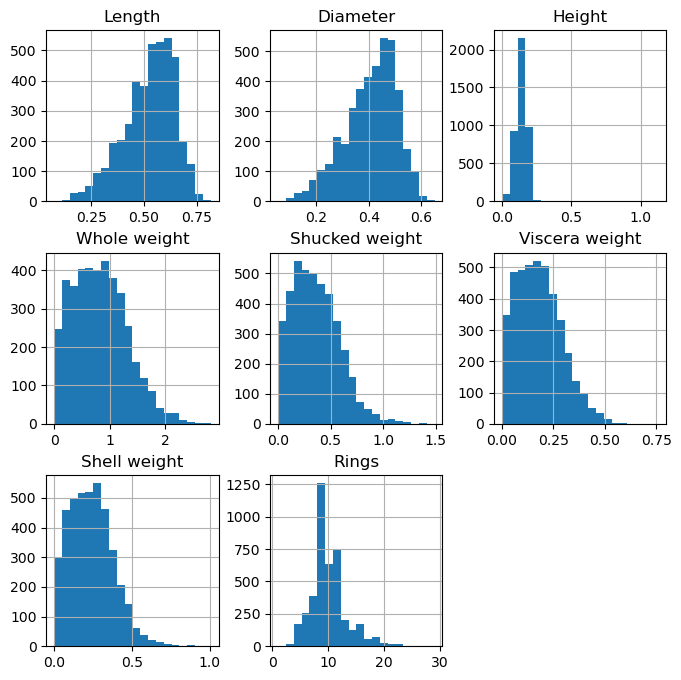

In [22]:
df.hist(bins=20, figsize=(8,8))
plt.show()

На представленных гисограммах можно заметить, что колонки содержат распределение похожее на нормальное и на логарифмическое. Более подробно изучим каждую колонку в однофакторном анализе.

## Однофакторный анализ

### Пол

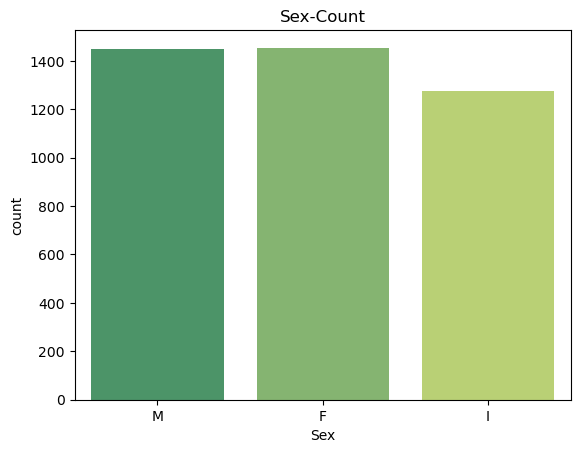

In [26]:
sns.countplot(df, x='Sex', hue='Sex', palette='summer')
plt.title('Sex-Count')
plt.show()

На графике можно заметить, что женский и мужской пол по количеству почти одинаково, а количество младенцев уже имеет отличие.

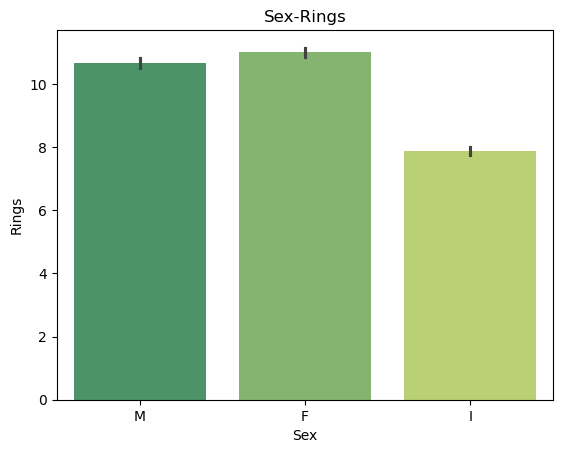

In [28]:
sns.barplot(df, x='Sex', y='Rings', hue='Sex', palette='summer')
plt.title('Sex-Rings')
plt.show()

Если сравнивать относительно возраста, то средний возраст морского ушка женского пола, чуть больше мужского.

Если сравнивать младенцев, то их средний  возраст значительно отличается от других групп морских ушков.

### Длина самой большой оболочки

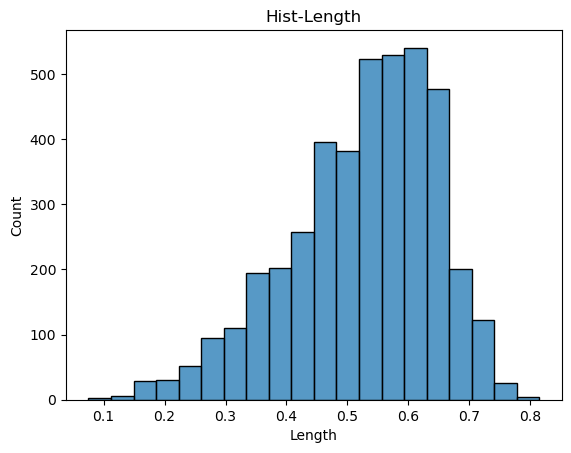

In [31]:
sns.histplot(df.Length, bins=20)
plt.title('Hist-Length')
plt.show()

Распределение похоже на нормальное, с отклонением в правую сторону.

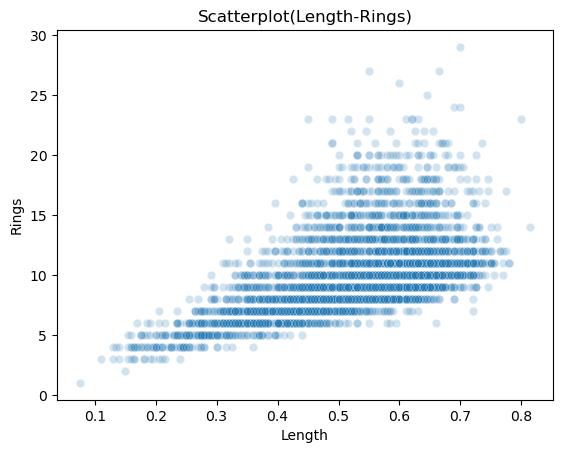

In [33]:
sns.scatterplot(x=df.Length, y=df.Rings, alpha=0.2)
plt.title('Scatterplot(Length-Rings)')
plt.show()

При увеличении длины самой большой оболочки, возраст увеличивается.

### Диаметр перпендикулярный длине

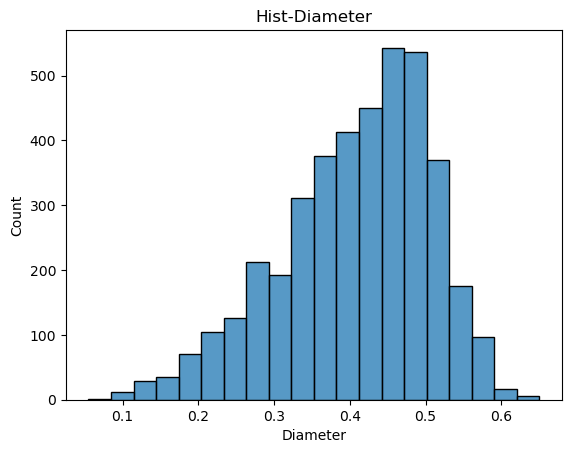

In [36]:
sns.histplot(df.Diameter, bins=20)
plt.title('Hist-Diameter')
plt.show()

Распределение похоже на нормальное, с отклонением в правую сторону.

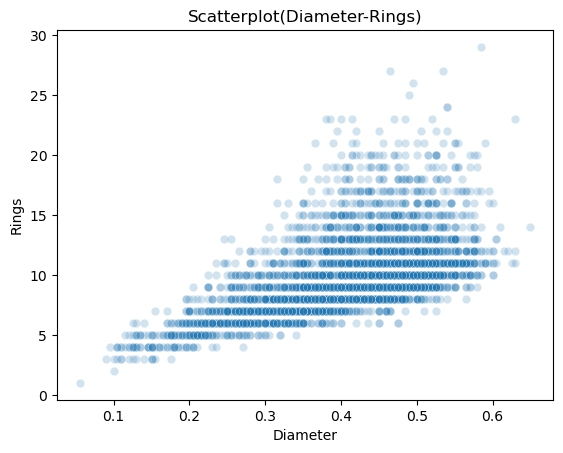

In [38]:
sns.scatterplot(x=df.Diameter, y=df.Rings, alpha=0.2)
plt.title('Scatterplot(Diameter-Rings)')
plt.show()

При увеличении диаметра, возраст увеличивается.

In [40]:
print('Количество пустых значений: {}'.format(df['Diameter'].isnull().sum()))

Количество пустых значений: 99


In [41]:
df['Diameter'] = df['Diameter'].fillna(df['Diameter'].median())

### Высота

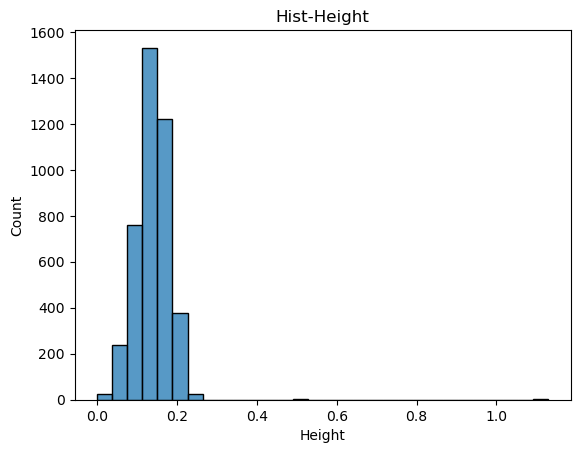

In [43]:
sns.histplot(df.Height, bins=30)
plt.title('Hist-Height')
plt.show()

Распределение похоже на нормальное, но заметны некоторые выбросы.

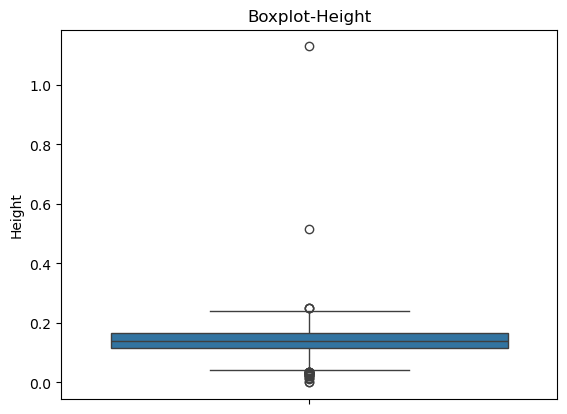

In [45]:
sns.boxplot(df.Height)
plt.title('Boxplot-Height')
plt.show()

Присутствуют значительные выбросы, чтобы решить данную проблему, посмотрим на график рассеивания высоты и возраста.

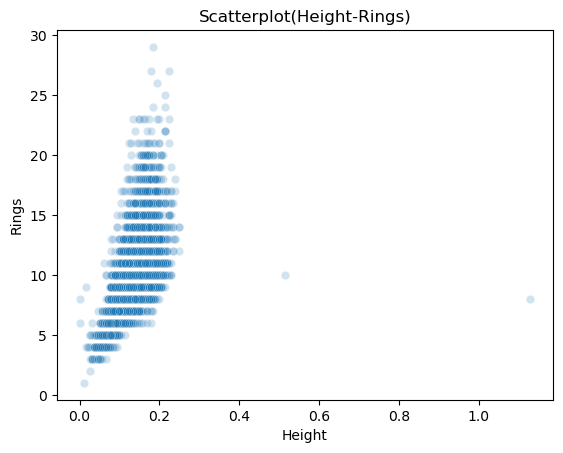

In [47]:
sns.scatterplot(x=df.Height, y=df.Rings, alpha=0.2)
plt.title('Scatterplot(Height-Rings)')
plt.show()

Можно сделать вывод, что значения высоты больше 0.3 являются ошибочные.

При этом некоторые объекты имеет нулевые значения по высоте, что также является ошибкой.

При увеличении высоты, возраст увеличивается.

In [49]:
df[(df['Height']>0.3) | (df['Height']==0)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.340,0.000,0.428,0.2065,0.0860,0.1150,8
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8
3996,I,0.315,0.230,0.000,0.134,0.0575,0.0285,0.3505,6


In [50]:
df[df['Rings']==8].describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,568.000000,568.000000,568.000000,554.000000,568.000000,568.000000,566.000000,568.0
mean,0.498776,0.385757,0.128556,0.640752,0.293773,0.138502,0.178887,8.0
std,0.079221,0.064629,0.048914,0.297566,0.145127,0.067768,0.075492,0.0
min,0.255000,0.195000,0.000000,0.080000,0.031500,0.013500,0.027000,8.0
25%,0.450000,0.350000,0.110000,0.429750,0.187375,0.090375,0.126000,8.0
50%,0.500000,0.385000,0.125000,0.594250,0.271750,0.126250,0.170000,8.0
75%,0.555000,0.430000,0.145000,0.849500,0.393750,0.185500,0.229375,8.0
max,0.720000,0.565000,1.130000,1.710000,0.825500,0.385500,0.470000,8.0


Вывод по выбросам:
* Объект 1257: заменить массу медианным значением для возраста 8
* Объект 1417: удалить
* Объект 2051: разделить массу на 10
* Объект 3996: заменить массу медианным значением для возраста 6

In [52]:
df.loc[1257,'Height'] = df[df['Rings']==8]['Height'].median()
df.loc[2051,'Height'] = df['Height'].loc[2051]/10
df.loc[3996,'Height'] = df[df['Rings']==6]['Height'].median()
df = df.drop(index=1417, axis=0)

### Масса цельного морского ушка

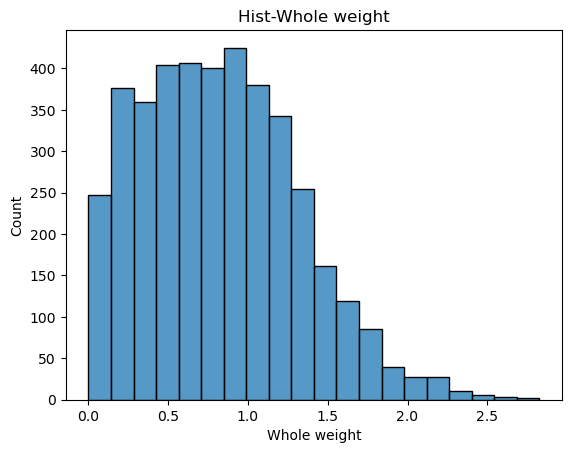

In [54]:
sns.histplot(df['Whole weight'], bins=20)
plt.title('Hist-Whole weight')
plt.show()

Распределение похоже на логарифмическое.

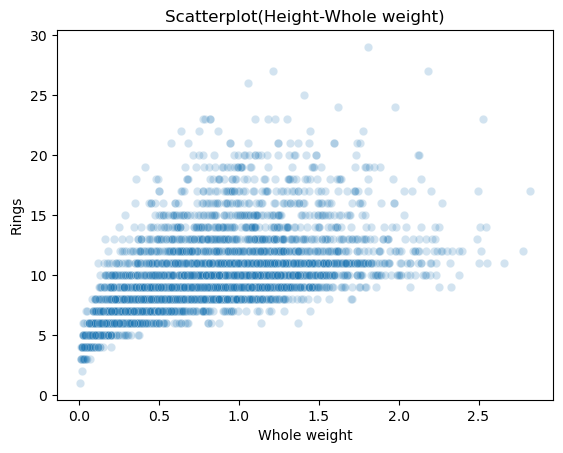

In [56]:
sns.scatterplot(x=df['Whole weight'], y=df.Rings, alpha=0.2)
plt.title('Scatterplot(Height-Whole weight)')
plt.show()

При увеличении массы возраст увеличивается.

In [58]:
print('Количество пустых значений: {}'.format(df['Whole weight'].isnull().sum()))

Количество пустых значений: 99


Если рассуждать логически, то можно предположить, что:

**Whole weight = Shucked weight + Viscera weight + Shell weight**

Проверим данное предположение

In [60]:
remain = df.dropna(axis=0)[['Whole weight','Shucked weight','Viscera weight','Shell weight']].apply(lambda df: df['Whole weight']-df['Shucked weight']-df['Viscera weight']-df['Shell weight'],axis=1).mean()

print("Остаток: {}".format(round(remain,4)))

Остаток: 0.0501


Должно было получиться 0, возможно при взвешивании присутствовала погрешность.

In [62]:
print('Остаток составляет {}% от средней массы морского ушка'.format(round(remain/df['Whole weight'].mean()*100)))

Остаток составляет 6% от средней массы морского ушка


Для нахождения пустых значений массы морского ушка будет использоваться следующая формула:

**Whole weight = Shucked weight + Viscera weight + Shell weight + 0.0501**

In [64]:
for i in df[df['Whole weight'].isnull()].index:
    df.loc[i,'Whole weight'] = df.loc[i,'Shucked weight']+df.loc[i,'Viscera weight']+df.loc[i,'Shell weight']+remain

In [65]:
df[df['Whole weight'].isnull()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3588,M,0.65,0.515,0.185,NaN,0.75,0.1805,NaN,12


In [66]:
df=df.drop(index=3588,axis=0)

### Масса мяса

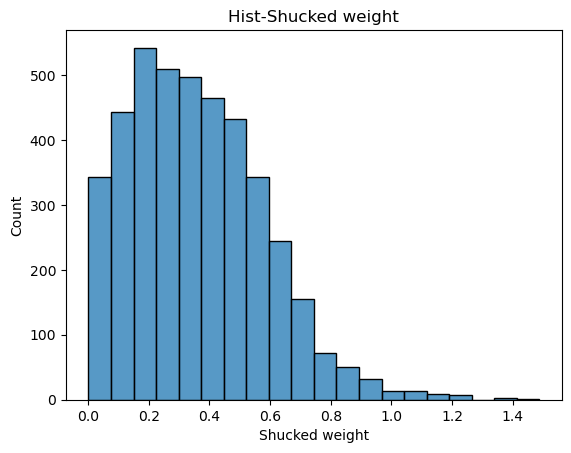

In [68]:
sns.histplot(df['Shucked weight'], bins=20)
plt.title('Hist-Shucked weight')
plt.show()

Распределение похоже на логарифмическое.

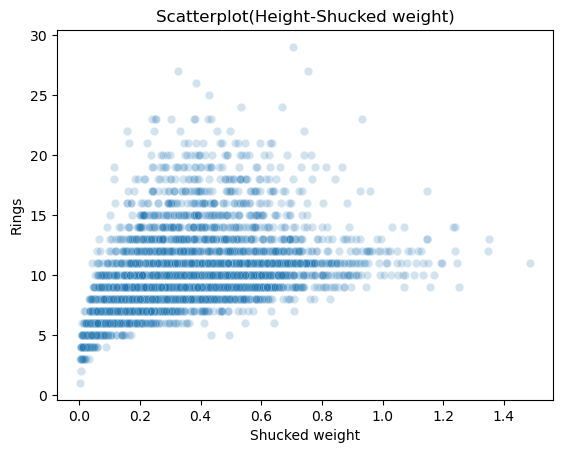

In [70]:
sns.scatterplot(x=df['Shucked weight'], y=df.Rings, alpha=0.2)
plt.title('Scatterplot(Height-Shucked weight)')
plt.show()

При увеличении массы мяса возраст возрастает.

### Масса кишечника

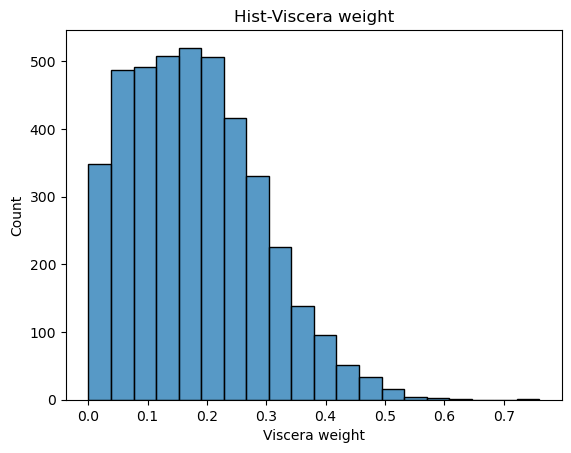

In [73]:
sns.histplot(df['Viscera weight'], bins=20)
plt.title('Hist-Viscera weight')
plt.show()

Распределение похоже на логарифмическое.

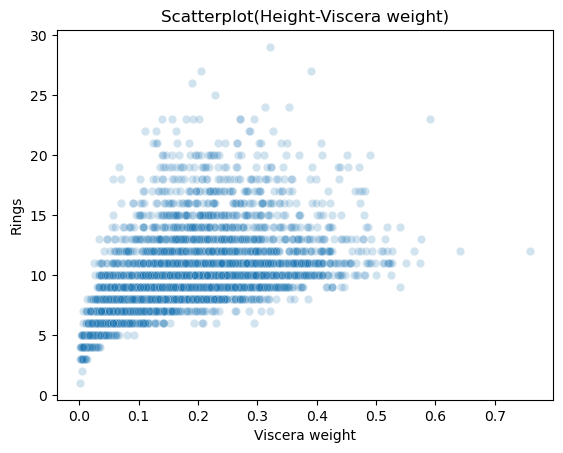

In [75]:
sns.scatterplot(x=df['Viscera weight'], y=df.Rings, alpha=0.2)
plt.title('Scatterplot(Height-Viscera weight)')
plt.show()

При увеличении массы кишечника возраст увеличивается.

### Масса ракушки

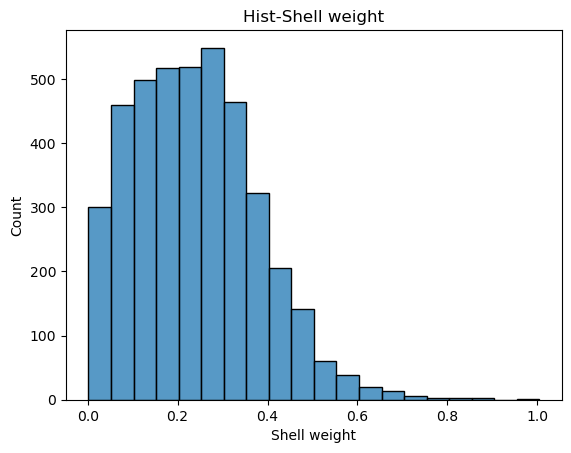

In [78]:
sns.histplot(df['Shell weight'], bins=20)
plt.title('Hist-Shell weight')
plt.show()

Распределение похоже на логарифмическое.

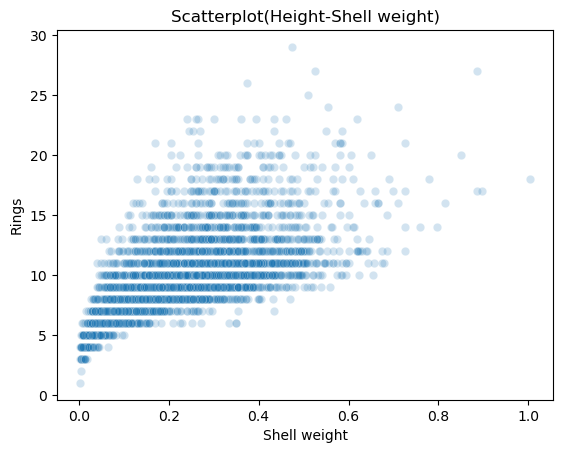

In [80]:
sns.scatterplot(x=df['Shell weight'], y=df.Rings, alpha=0.2)
plt.title('Scatterplot(Height-Shell weight)')
plt.show()

При увеличении массы ракушки возраст увеличивается.

In [82]:
print('Количество пустых значений: {}'.format(df['Shell weight'].isnull().sum()))

Количество пустых значений: 49


Для нахождения пустых значений массы морского ушка будет использоваться следующая формула:

**Shell weight = Whole weight - Shucked weight - Viscera weight - 0.0501**

In [84]:
for i in df[df['Shell weight'].isnull()].index:
    df.loc[i,'Shell weight'] = df.loc[i,'Whole weight']-df.loc[i,'Shucked weight']-df.loc[i,'Viscera weight']-remain

In [85]:
print('Количество пустых значений: {}'.format(df['Shell weight'].isnull().sum()))

Количество пустых значений: 0


## Взаимозависимость в данных

### Корреляция

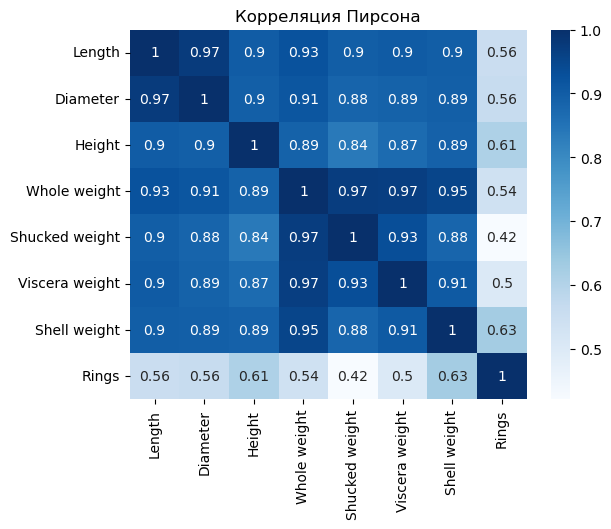

In [88]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('Корреляция Пирсона')
plt.show()

Все признаки сильно коррелируют между собой. 
Целевая переменая **возраст** имеет среднюю корреляцию между признаками, это говорит о том, что линейная зависимость есть, но возможно присутствует нелинейность.

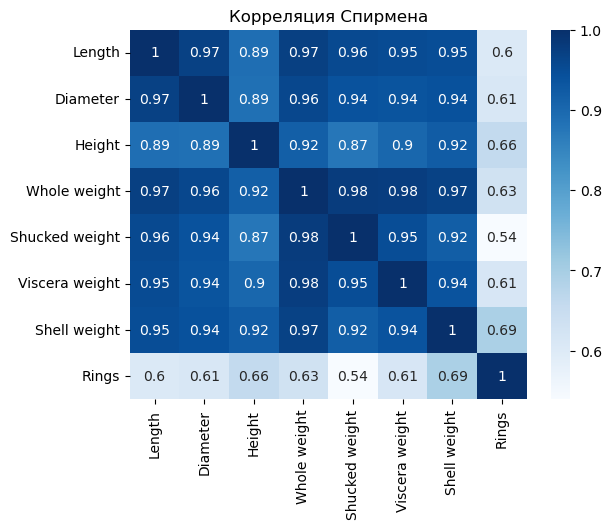

In [90]:
corr = df.corr(method='spearman',numeric_only=True)

sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('Корреляция Спирмена')
plt.show()

Используя корреляцию Спирмена, можно заметить, что корреляция улучшилась у признаков и  целевой переменной.

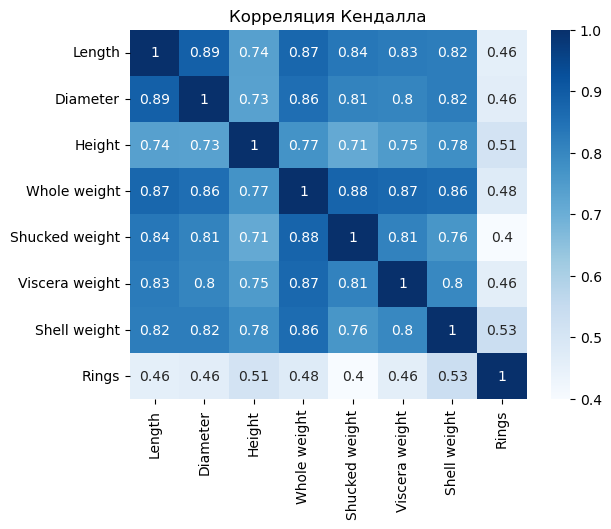

In [92]:
corr = df.corr(method='kendall', numeric_only=True)

sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('Корреляция Кендалла')
plt.show()

В случае корреляции Кендалла результаты корреляции ухудшились.

### V-мера Крамера

Используется для измерения связи между категориальными признаками, но в нашем датасете только один категориальный признак.

### ANOVA

In [97]:
from scipy.stats import f_oneway

Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Rings,Yes


По результатам дисперсионного анализа средние значения количественных переменных, разбитых по категориям пола, различаются. Следовательно, количественные признаки и целевая переменная зависят от категориального признака пол. 

## Анализ целевой переменной

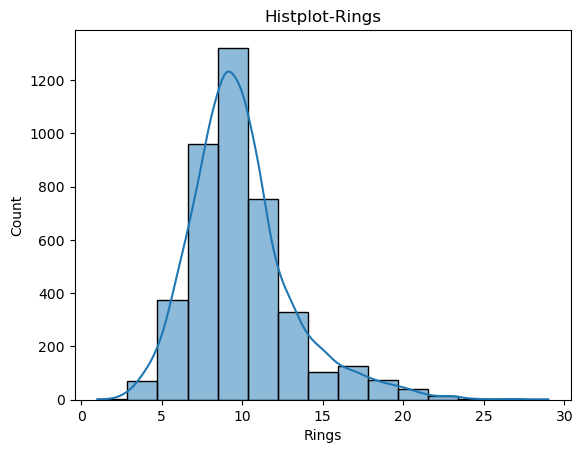

In [100]:
sns.histplot(df,x='Rings', kde=True, bins=15)
plt.title('Histplot-Rings')
plt.show()

Распределение целевой переменной похоже на нормальное, но присутствует небольшой хвост справа. Таким образом, из-за небольшого количества данных модель может плохо обучиться на диапозоне от 20 до 30.

## Pandas vs Polars

In [103]:
df.shape

(4175, 9)

In [104]:
df_big = df.copy()

for i in range(240):
  df_big = pd.concat([df_big, df])

df_big.to_csv("diamonds_big.csv", index=False)

In [105]:
df_big.shape

(1006175, 9)

In [106]:
!pip install polars

import polars as pl

print(pl.__version__)

1.14.0


#### Загрузка данных

In [108]:
%%time

df_pl = pl.read_csv("diamonds_big.csv")

CPU times: total: 828 ms
Wall time: 407 ms


In [109]:
%%time

df = pd.read_csv("diamonds_big.csv")

CPU times: total: 609 ms
Wall time: 646 ms


Polars выполнил загрузку данных быстрее, чем Pandas

#### Фильтрация данных

In [112]:
%%time

df.query('Rings > 25')

CPU times: total: 0 ns
Wall time: 26.4 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
294,M,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.375,26
480,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
2107,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.885,27
2208,F,0.550,0.465,0.180,1.2125,0.3245,0.2050,0.525,27
4469,M,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.375,26
...,...,...,...,...,...,...,...,...,...
1000033,F,0.550,0.465,0.180,1.2125,0.3245,0.2050,0.525,27
1002294,M,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.375,26
1002480,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
1004107,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.885,27


In [113]:
%%time

df_pl.filter(pl.col('Rings') > 5)

CPU times: total: 125 ms
Wall time: 95.6 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""M""",0.44,0.365,0.125,0.534564,0.2155,0.114,0.155,10
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
…,…,…,…,…,…,…,…,…
"""F""",0.565,0.45,0.165,0.887,0.37,0.239,0.249,11
"""M""",0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10
"""M""",0.6,0.475,0.205,1.176,0.5255,0.2875,0.308,9


Polars выполнил фильтрацию данных быстрее, чем Pandas

#### Агрегация данных

In [116]:
%%time

df.groupby('Sex').agg({'Length' : 'mean', 'Rings' : 'max'})

CPU times: total: 93.8 ms
Wall time: 97.6 ms


,Length,Rings
Sex,,
F,0.572978,29
I,0.427273,21
M,0.559896,27


In [117]:
%%time

df_pl.group_by('Sex').agg([pl.mean('Length'), pl.max('Rings')])

CPU times: total: 125 ms
Wall time: 73.2 ms


Sex,Length,Rings
str,f64,i64
"""F""",0.572978,29
"""M""",0.559896,27
"""I""",0.427273,21


In [118]:
%%time

q = (
    df_pl
    .lazy()
    .group_by(by='Sex')
    .agg(
        [
            pl.col('Length').mean(),
            pl.col('Rings').max()
        ]
    )
)

CPU times: total: 0 ns
Wall time: 0 ns


In [119]:
%%time

q.collect()

CPU times: total: 78.1 ms
Wall time: 51.7 ms


by,Length,Rings
str,f64,i64
"""F""",0.572978,29
"""I""",0.427273,21
"""M""",0.559896,27


Polars выполнил агрегацию данных быстрее, чем Pandas.

При использовании ленивых вычислений Polars выполняет агрегацию еще быстрее.